# **Apple vs Oranges**

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
from google.colab import drive


In [4]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/Trash'

In [0]:
tfms = get_transforms(do_flip=False)


In [0]:
data = ImageDataBunch.from_folder(path,ds_tfms=tfms, size=100)


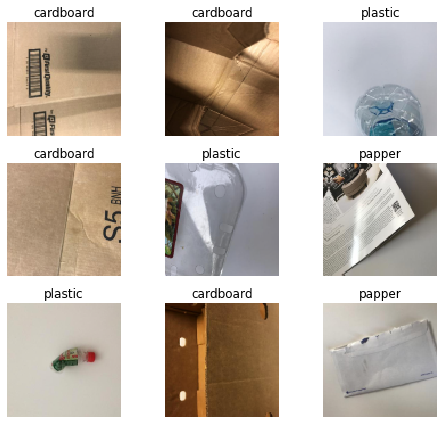

In [8]:
data.show_batch(rows=3,figsize=(7,6))

In [9]:
print(data.classes)

['cardboard', 'papper', 'plastic']


In [10]:
len(data.classes),data.c

(3, 3)

In [11]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 27.0MB/s]


In [12]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.382010,0.720336,0.308176,02:15
1,0.939897,0.642534,0.220126,00:10
2,0.680320,0.670407,0.157233,00:06
3,0.552320,0.655119,0.163522,00:06


In [0]:
learn.save('stage-1')

In [15]:
interp = ClassificationInterpretation.from_learner(learn)


In [0]:
losses,idxs = interp.top_losses()


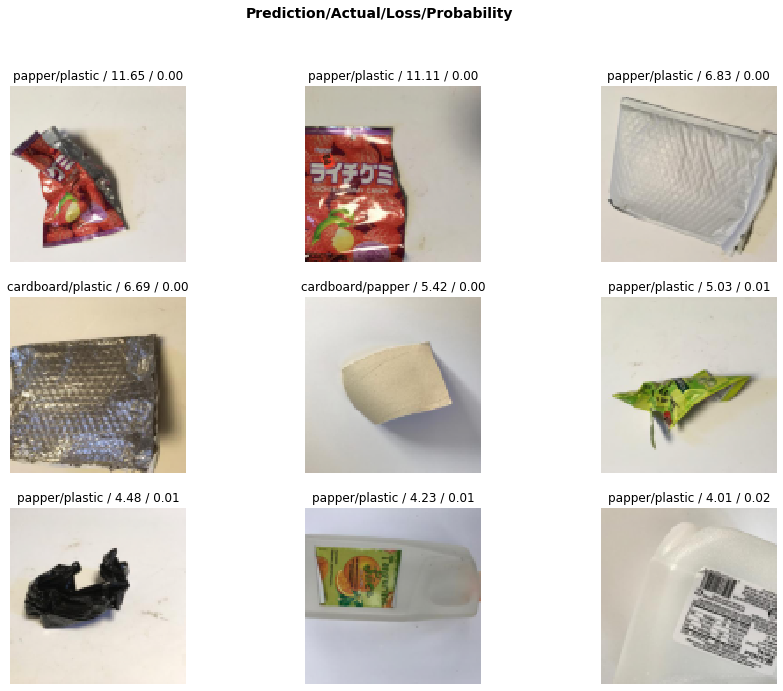

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

In [18]:
interp.most_confused(min_val=2)

[('plastic', 'papper', 10),
 ('cardboard', 'papper', 8),
 ('papper', 'cardboard', 3),
 ('papper', 'plastic', 3)]

In [0]:
learn.unfreeze()

In [20]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.395105,0.865688,0.176101,00:06


In [0]:
learn.load('stage-1');

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


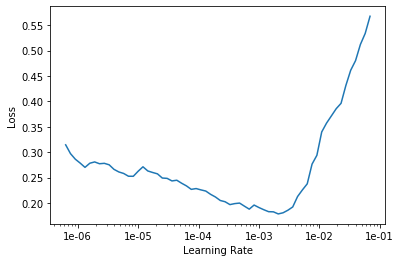

In [23]:
learn.recorder.plot()


In [0]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.371001,0.882441,0.163522,00:06
1,0.255667,0.770488,0.132075,00:06


In [0]:
filename= '/content/drive/My Drive/paper420.jpg'

In [0]:
img = open_image(filename)

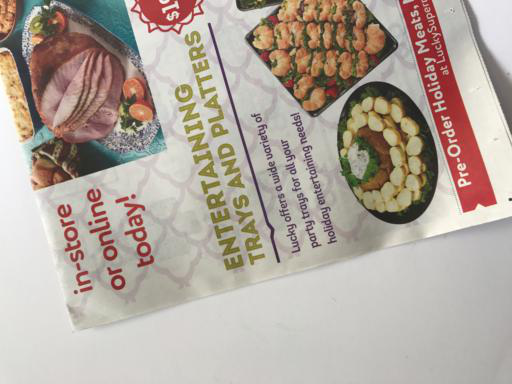

In [39]:
img

In [40]:
learn.predict(img)

(Category papper, tensor(1), tensor([1.1983e-04, 9.9795e-01, 1.9275e-03]))

In [0]:
learn.export('learn.pkl')